## Netflix Data Analysis Project

## Step 1: Data Loading and Inspection

In [23]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load and Inspect Dataset
import pandas as pd
df = pd.read_csv("Netflix Dataset (8).csv")

In [8]:
df.shape

(7789, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [5]:
df.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,23-Dec-16,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,20-Dec-18,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,16-Nov-17,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,01-Jan-20,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Step 2: Data Cleaning

In [9]:
# Check missing values
df.isnull().sum()


Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

In [14]:
print(df.duplicated().sum())


2


In [16]:
# handle duplicates
df.drop_duplicates(inplace=True)
print(f"\n Duplicates Removed. New shape: {df.shape}")


 Duplicates Removed. New shape: (7787, 12)


In [12]:
# Fill missing categorical data with 'Unknown'
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)
df['Rating'].fillna('Not Rated', inplace=True)

In [26]:
# Convert Release_Date to datetime and extract year
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

In [27]:
df.isnull().sum()

Show_Id          0
Category         0
Title            0
Director         0
Cast             0
Country          0
Release_Date     0
Rating           0
Duration         0
Type             0
Description      0
Year            10
dtype: int64

In [28]:
# Drop the year column from the DataFrame.
df = df.drop(columns=['Year'])

In [29]:
df.isnull().sum()

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
dtype: int64

In [30]:
# Convert specific columns where needed
df['Show_Id'] = df['Show_Id'].astype(str)
df['Category'] = df['Category'].astype('category')
df['Title'] = df['Title'].astype(str)
df['Director'] = df['Director'].astype(str)
df['Cast'] = df['Cast'].astype(str)
df['Country'] = df['Country'].astype(str)
df['Rating'] = df['Rating'].astype(str)
df['Type'] = df['Type'].astype(str)
df['Description'] = df['Description'].astype(str)

print("\n Data Types Standardized!")


 Data Types Standardized!


In [31]:
# Extract Year and Month from Release_Date
df['Year'] = df['Release_Date'].dt.year
df['Month'] = df['Release_Date'].dt.month_name()

In [32]:
# Standardize text columns (strip spaces, make title case)
text_cols = ['Title', 'Director', 'Cast', 'Country', 'Rating', 'Type', 'Description']
for col in text_cols:
    df[col] = df[col].str.strip().str.title()

In [33]:
#Clean Duration Column
# Some entries like "90 min" or "2 Seasons"
df['Duration'] = df['Duration'].str.replace(' ', '')
df['Duration_Numeric'] = df['Duration'].str.extract('(\d+)').astype(float)
df['Duration_Unit'] = np.where(df['Duration'].str.contains('Season', case=False), 'Seasons', 'Minutes')


In [35]:
#verify Cleaned Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Show_Id           7787 non-null   object        
 1   Category          7787 non-null   category      
 2   Title             7787 non-null   object        
 3   Director          7787 non-null   object        
 4   Cast              7787 non-null   object        
 5   Country           7787 non-null   object        
 6   Release_Date      7787 non-null   datetime64[ns]
 7   Rating            7787 non-null   object        
 8   Duration          7787 non-null   object        
 9   Type              7787 non-null   object        
 10  Description       7787 non-null   object        
 11  Year              7787 non-null   int32         
 12  Month             7787 non-null   object        
 13  Duration_Numeric  7787 non-null   float64       
 14  Duration_Unit     7787 non-nu

In [39]:
# Sample Cleaned Data 
df.head(5)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Year,Month,Duration_Numeric,Duration_Unit
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,Tv-Ma,4Seasons,"International Tv Shows, Tv Dramas, Tv Sci-Fi &...",In A Future Where The Elite Inhabit An Island ...,2020,August,4.0,Seasons
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,Tv-Ma,93min,"Dramas, International Movies",After A Devastating Earthquake Hits Mexico Cit...,2016,December,93.0,Minutes
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,R,78min,"Horror Movies, International Movies","When An Army Recruit Is Found Dead, His Fellow...",2018,December,78.0,Minutes
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,Pg-13,80min,"Action & Adventure, Independent Movies, Sci-Fi...","In A Postapocalyptic World, Rag-Doll Robots Hi...",2017,November,80.0,Minutes
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,Pg-13,123min,Dramas,A Brilliant Group Of Students Become Card-Coun...,2020,January,123.0,Minutes


In [40]:
print(df.isnull().sum())

Show_Id             0
Category            0
Title               0
Director            0
Cast                0
Country             0
Release_Date        0
Rating              0
Duration            0
Type                0
Description         0
Year                0
Month               0
Duration_Numeric    0
Duration_Unit       0
dtype: int64


In [41]:
print(df.nunique())

Show_Id             7787
Category               2
Title               7786
Director            4050
Cast                6832
Country              682
Release_Date        1512
Rating                15
Duration             216
Type                 492
Description         7769
Year                  14
Month                 12
Duration_Numeric     206
Duration_Unit          2
dtype: int64


## Movies vs TV Shows Distribution

C:\Users\USER\AppData\Local\Temp\ipykernel_21060\1990777408.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette='viridis')


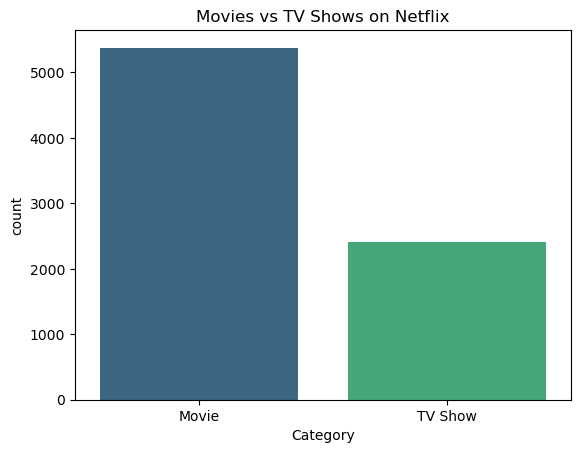

In [42]:
sns.countplot(data=df, x='Category', palette='viridis')
plt.title('Movies vs TV Shows on Netflix')
plt.show()

## Content Added Over Time

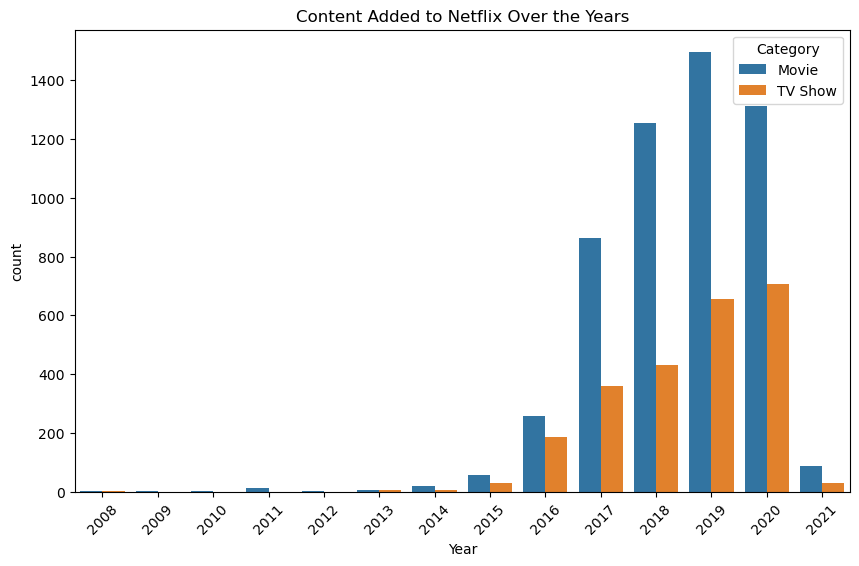

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Year', hue='Category')
plt.title('Content Added to Netflix Over the Years')
plt.xticks(rotation=45)
plt.show()


## Top 10 Countries by Content Count

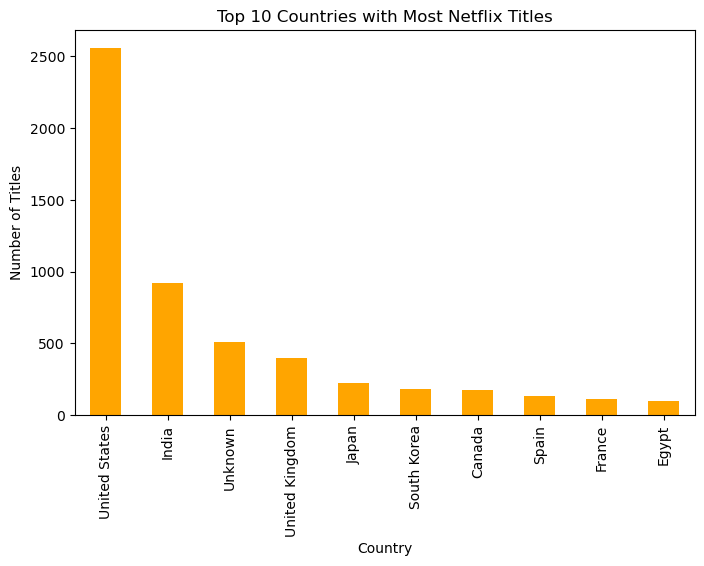

In [49]:
top_countries = df['Country'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(8,5), color='orange')
plt.title('Top 10 Countries with Most Netflix Titles')
plt.ylabel('Number of Titles')
plt.show()

## Popular Genres

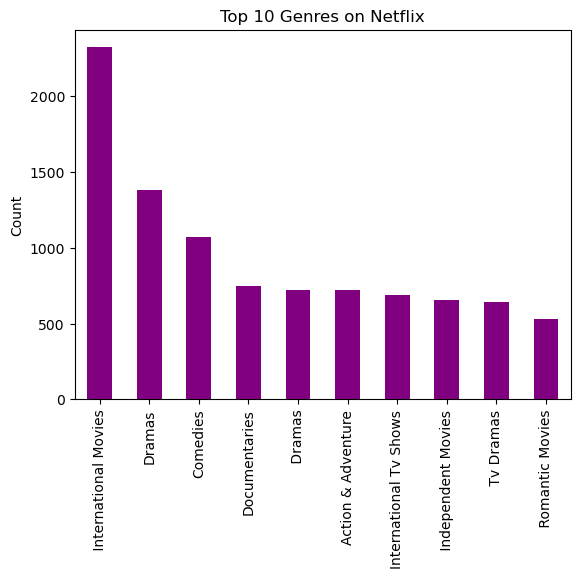

In [44]:
from collections import Counter

genres = df['Type'].str.split(',').sum()
pd.Series(genres).value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Top 10 Genres on Netflix')
plt.ylabel('Count')
plt.show()


## Most Common Ratings

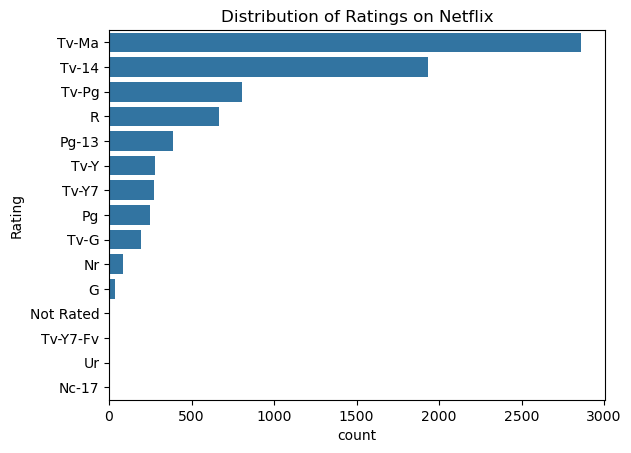

In [50]:
sns.countplot(data=df, y='Rating', order=df['Rating'].value_counts().index)
plt.title('Distribution of Ratings on Netflix')
plt.show()

## Correlation Between Type and Duration

print(df['Duration'].value_counts().head(10))


## Heatmap: Country vs Category

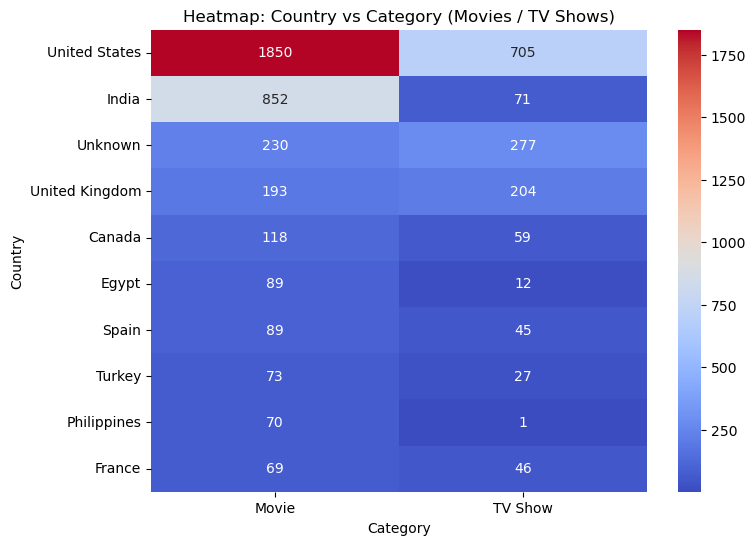

In [51]:
pivot_table = pd.crosstab(df['Country'], df['Category'])
top10 = pivot_table.sort_values(by='Movie', ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.heatmap(top10, annot=True, fmt='d', cmap='coolwarm')
plt.title("Heatmap: Country vs Category (Movies / TV Shows)")
plt.show()


**Insights Summary :-**

Insight	                                             Observation
Movies vs TV Shows                             	Movies dominate, but TV Shows are rising post-2016
Top Country	                                    Likely USA, followed by India and UK
Popular Genres	                                International Movies, Dramas, Comedies
Ratings                                       	TV-MA and TV-14 are most common
Yearly Trend                                	Peak addition around 2018–2020

**Strategic Recommendations:-**

1. Increase investment in regional and international content (especially India, Korea).

2. Focus on popular genres like Drama and Documentaries.

3. Develop family-friendly and PG-rated content for broader audiences.

4. Analyze underrepresented genres for niche audience targeting.

**Conclusion:-**

Netflix’s catalog is dominated by movies, but TV shows have grown rapidly in recent years. The U.S., India, and the U.K. are the top content contributors. Most titles are rated TV-MA or TV-14, with drama and international genres leading in popularity. Content additions peaked around 2018–2020, showing Netflix’s major expansion phase. Overall, Netflix should keep investing in regional content, diverse genres, and original productions to stay competitive.